In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
col_names = ['host_id', 'host_since', 'neighbourhood', 'city', 'accommodates', 'price']

listing = pd.read_csv("Listings.csv", 
                    usecols = col_names,
                    encoding="ISO-8859-1", 
                    low_memory = False)

# Data Exploration and Cleaning:

In [3]:
listing.head()

,host_id,host_since,neighbourhood,city,accommodates,price
0,1466919,2011-12-03,Buttes-Montmartre,Paris,2,53
1,10328771,2013-11-29,Buttes-Montmartre,Paris,2,120
2,19252768,2014-07-31,Elysee,Paris,2,89
3,10668311,2013-12-17,Vaugirard,Paris,2,58
4,24837558,2014-12-14,Passy,Paris,2,60


In [4]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   host_id        279712 non-null  int64 
 1   host_since     279547 non-null  object
 2   neighbourhood  279712 non-null  object
 3   city           279712 non-null  object
 4   accommodates   279712 non-null  int64 
 5   price          279712 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 12.8+ MB


In [5]:
listing['host_since'] = pd.to_datetime(listing['host_since'])

In [6]:
listing['city'].unique()

array(['Paris', 'New York', 'Bangkok', 'Rio de Janeiro', 'Sydney',
       'Istanbul', 'Rome', 'Hong Kong', 'Mexico City', 'Cape Town'],
      dtype=object)

In [7]:
paris_listing = listing.query("city == 'Paris'")

paris_listing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_id        64690 non-null  int64         
 1   host_since     64657 non-null  datetime64[ns]
 2   neighbourhood  64690 non-null  object        
 3   city           64690 non-null  object        
 4   accommodates   64690 non-null  int64         
 5   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 3.5+ MB


In [8]:
paris_listing.isna().sum()

host_id           0
host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [9]:
paris_listing[['accommodates', 'price']].describe()

,accommodates,price
count,64690.000000,64690.000000
mean,3.037997,113.096445
std,1.588766,214.433668
min,0.000000,0.000000
25%,2.000000,59.000000
50%,2.000000,80.000000
75%,4.000000,120.000000
max,16.000000,12000.000000


In [10]:
paris_listing.query('price == 0').count()

host_id          62
host_since       62
neighbourhood    62
city             62
accommodates     62
price            62
dtype: int64

In [11]:
paris_listing = paris_listing.drop(paris_listing.query('price == 0').index)

In [12]:
paris_listing.query('accommodates == 0').count()

host_id          0
host_since       0
neighbourhood    0
city             0
accommodates     0
price            0
dtype: int64

# Data Preperation:

In [13]:
paris_listing_neighbourhood = (
    paris_listing
    .groupby('neighbourhood')[['price']]
    .agg('mean')
    .sort_values('price')
)

paris_listing_neighbourhood.head()

,price
neighbourhood,
Menilmontant,74.962204
Buttes-Chaumont,82.690182
Buttes-Montmartre,87.233587
Reuilly,89.125566
Popincourt,90.588652


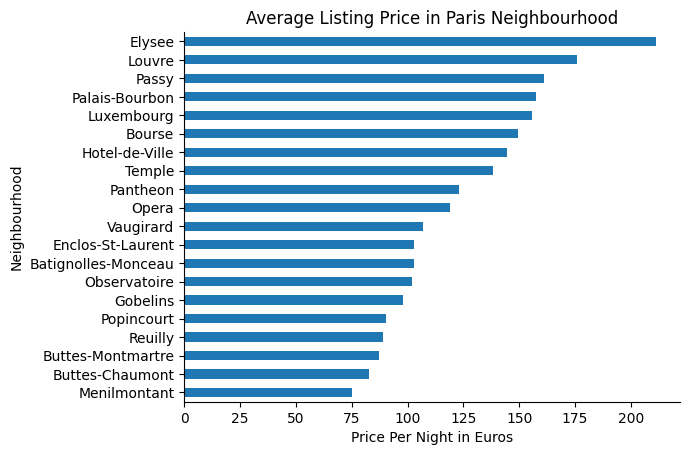

In [14]:
(
    paris_listing_neighbourhood
    .plot
    .barh(
        title = "Average Listing Price in Paris Neighbourhood",
        xlabel = "Price Per Night in Euros",
        ylabel = "Neighbourhood",
        legend = None
    )
)
sns.despine()

In [15]:
paris_listing_accomodations = (
    paris_listing
    .query("neighbourhood == 'Elysee'")
    .groupby('accommodates')
    .agg({"price": 'mean'})
    .sort_values('price')
)

paris_listing_accomodations.head()

,price
accommodates,
1,79.522222
3,153.882759
2,155.103352
4,212.096070
5,328.817073


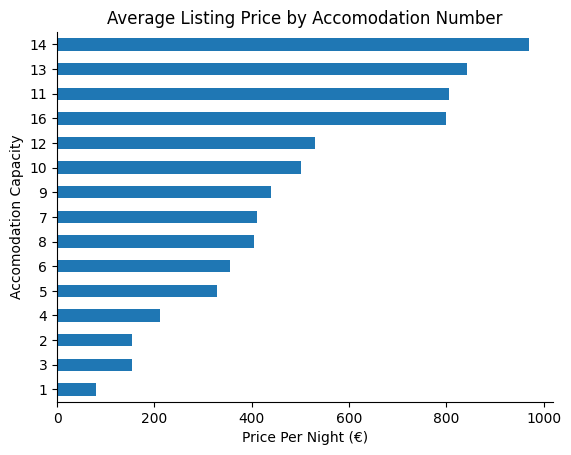

In [16]:
(
    paris_listing_accomodations
    .plot
    .barh(
        title = "Average Listing Price by Accomodation Number",
        xlabel = "Price Per Night (€)",
        ylabel = "Accomodation Capacity",
        legend = None
    )
)
sns.despine()

In [17]:
paris_listing_overtime = (
    paris_listing
    .set_index("host_since")
    .resample("Y")
    .agg({"host_id": "count", "price": "mean"})
)

paris_listing_overtime.head()

C:\Users\Jimmy\AppData\Local\Temp\ipykernel_4812\2320151441.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  .resample("Y")


,host_id,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615


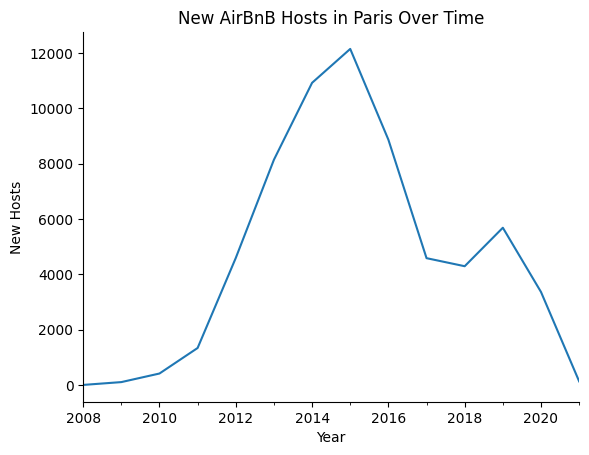

In [18]:
paris_listing_overtime["host_id"].plot(
    ylabel = "New Hosts",
    title = "New AirBnB Hosts in Paris Over Time",
    xlabel = "Year"
)
sns.despine()

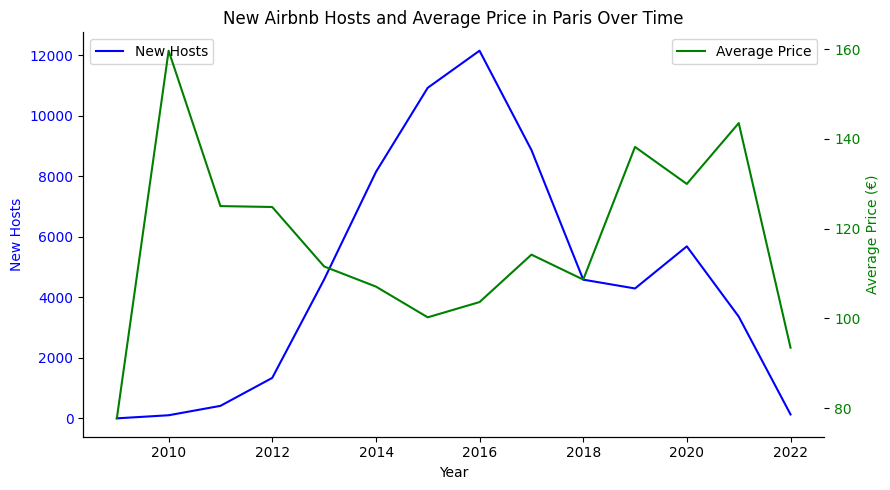

In [19]:
fig, ax1 = plt.subplots(figsize=(9, 5))


ax1.plot(
    paris_listing_overtime.index, 
    paris_listing_overtime["host_id"], 
    label="New Hosts", 
    color="blue"
)
ax1.set_ylabel("New Hosts", color="blue")
ax1.set_xlabel("Year")
ax1.set_title("New Airbnb Hosts and Average Price in Paris Over Time")
ax1.tick_params(axis='y', labelcolor="blue")


ax2 = ax1.twinx()
ax2.plot(
    paris_listing_overtime.index, 
    paris_listing_overtime["price"], 
    label="Average Price", 
    color="green"
)
ax2.set_ylabel("Average Price (€)", color="green")
ax2.tick_params(axis='y', labelcolor="green")

ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

sns.despine()

plt.tight_layout()
plt.show()